In [2]:
# from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split

# drive.mount('/content/drive')

In [3]:
import numpy as np
from sklearn.preprocessing import (
    StandardScaler,
    PolynomialFeatures,
    OneHotEncoder,
    LabelEncoder
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from typing import Iterable, Union

warnings.filterwarnings(action='ignore')

In [4]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
def print_all_reg(Y_test,pred):
    # Specificity를 구하기 위해 confusion matrix를 이용

    cm1 = confusion_matrix(Y_test,pred)
    specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])

    #결과 검사
    #recall = cm1[1,1]/(cm1[1,1]+cm1[1,0])
    #pre = cm1[1,1]/(cm1[1,1]+cm1[0,1])

    G_mean = recall_score(Y_test,pred) * specificity1
    print("model의 recall 값은 {:.3f}".format(recall_score(Y_test,pred)))
    print("model의 2종 오류 확률 값은 {:.3f}".format(1-recall_score(Y_test,pred)))
    print("model의 Specificity 값은 {:.3f}".format(specificity1))
    print("model의 1종 오류 확률 값은 {:.3f}".format(1-specificity1))
    print("model의 precision 값은 {:.3f}".format(precision_score(Y_test,pred)))
    print("model의 f1_score 값은 {:.3f}".format(f1_score(Y_test,pred)))
    print("model의 G-mean 값은 {:.3f}".format(np.sqrt(G_mean)))
    print("model의 accuracy 값은 {:.3f}".format(accuracy_score(Y_test,pred)))

In [5]:
# URL = "/content/drive/MyDrive/SIL/WORK/DSS 머신러닝2/" # 데이터 위치 설정
X_train = df = pd.read_csv("dataset/Dataset2/X_train.csv")
X_test = df = pd.read_csv("dataset/Dataset2/X_test.csv")  #제출을 위한 X_test, 실험에는 사용X
Y_train = df = pd.read_csv("dataset/Dataset2/Y_train.csv")

In [6]:
X_train

,ID,Last Name,Credit Score,Nationality,Gender,Age,Employment Period,Account Balance,Number of Subscribed Product,Credit Card,Active Member,Salary
0,15692583,Udobata,678,France,Female,32,5,0.00,2,1,0,90284.47
1,15683157,Waring,613,France,Male,26,4,100446.57,1,0,1,149653.81
2,15731555,Ross-Watt,595,Germany,Female,45,9,106000.12,1,0,0,191448.96
3,15641170,Liang,640,Spain,Male,36,4,0.00,1,0,0,173016.46
4,15667476,Cox,477,Germany,Female,36,3,117700.86,1,0,0,74042.00
...,...,...,...,...,...,...,...,...,...,...,...,...
8995,15645593,Trevisani,599,France,Female,41,2,91328.71,1,1,0,115724.78
8996,15668889,Galgano,665,Germany,Female,43,2,116322.27,4,1,0,35640.12
8997,15667085,Meng,667,France,Male,33,4,0.00,2,1,1,131834.75
8998,15589030,Ts'ai,649,France,Male,47,1,0.00,2,1,1,145593.85


In [7]:
#불필요한 변수 제거
X_train.drop(['ID', 'Last Name'], axis=1, inplace = True)
X_test.drop(['ID', 'Last Name'], axis=1, inplace = True)

In [8]:
X_train

,Credit Score,Nationality,Gender,Age,Employment Period,Account Balance,Number of Subscribed Product,Credit Card,Active Member,Salary
0,678,France,Female,32,5,0.00,2,1,0,90284.47
1,613,France,Male,26,4,100446.57,1,0,1,149653.81
2,595,Germany,Female,45,9,106000.12,1,0,0,191448.96
3,640,Spain,Male,36,4,0.00,1,0,0,173016.46
4,477,Germany,Female,36,3,117700.86,1,0,0,74042.00
...,...,...,...,...,...,...,...,...,...,...
8995,599,France,Female,41,2,91328.71,1,1,0,115724.78
8996,665,Germany,Female,43,2,116322.27,4,1,0,35640.12
8997,667,France,Male,33,4,0.00,2,1,1,131834.75
8998,649,France,Male,47,1,0.00,2,1,1,145593.85


In [9]:
#Nationality에 어떤 국가가 있는지 확인
X_train['Nationality'].unique()

array(['France', 'Germany', 'Spain'], dtype=object)

간단한 전처리 과정

In [10]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Credit Score                  9000 non-null   int64  
 1   Nationality                   9000 non-null   object 
 2   Gender                        9000 non-null   object 
 3   Age                           9000 non-null   int64  
 4   Employment Period             9000 non-null   int64  
 5   Account Balance               9000 non-null   float64
 6   Number of Subscribed Product  9000 non-null   int64  
 7   Credit Card                   9000 non-null   int64  
 8   Active Member                 9000 non-null   int64  
 9   Salary                        9000 non-null   float64
dtypes: float64(2), int64(6), object(2)
memory usage: 703.2+ KB


In [11]:
#category 변수 변환
cat_cols = ['Nationality', 'Gender']

In [12]:
X_train[cat_cols] = X_train[cat_cols].astype('category')
X_test[cat_cols] = X_test[cat_cols].astype('category')

In [13]:
# 숫자형 데이터 타입 선택
numeric_cols = X_train.select_dtypes(include=['int', 'float']).columns.tolist()

In [14]:
numeric_cols

['Credit Score',
 'Age',
 'Employment Period',
 'Account Balance',
 'Number of Subscribed Product',
 'Credit Card',
 'Active Member',
 'Salary']

In [19]:
# One-hot-Encoding
X_train_encoded = pd.get_dummies(X_train, columns=['Nationality', 'Gender'])
X_test_encoded = pd.get_dummies(X_test, columns=['Nationality', 'Gender'])
# 변환된 데이터 확인
X_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Credit Score                  9000 non-null   int64  
 1   Age                           9000 non-null   int64  
 2   Employment Period             9000 non-null   int64  
 3   Account Balance               9000 non-null   float64
 4   Number of Subscribed Product  9000 non-null   int64  
 5   Credit Card                   9000 non-null   int64  
 6   Active Member                 9000 non-null   int64  
 7   Salary                        9000 non-null   float64
 8   Nationality_France            9000 non-null   uint8  
 9   Nationality_Germany           9000 non-null   uint8  
 10  Nationality_Spain             9000 non-null   uint8  
 11  Gender_Female                 9000 non-null   uint8  
 12  Gender_Male                   9000 non-null   uint8  
dtypes: 

In [21]:
# #Label Encoding--> 상황에 따라 Label Encoding 사용, Label encoding은 각각의 값을 0,1,2,3 ...로 반환함
# 설문조사와 같이 {매우나쁨, 나쁨, 보통, 좋음, 매우좋음} 인 경우 선택지 별 distance 유의미하지만
# 국가를 0,1,2,3 으로 단순 구분할 경우 무의미한 거리차 발생할 수 있음

# # LabelEncoder 객체 생성 
    
# label_encoder = LabelEncoder()

# # Nationality와 Gender 열에 대해 레이블 인코딩 적용
# for col in ['Nationality', 'Gender']:
#     X_train_encoded[col] = label_encoder.fit_transform(X_train[col])
#     X_test_encoded[col] = label_encoder.transform(X_test[col])

# # 변환된 데이터 확인
# X_train_encoded.info()

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Min-Max Scaler 생성
scaler = MinMaxScaler()

# Min-Max Scaling을 적용할 변수들에 대해 fit 및 transform 수행<--최종적으로 사용할 입력변수
X_train_encoded[numeric_cols] = scaler.fit_transform(X_train_encoded[numeric_cols])
X_test_encoded[numeric_cols] = scaler.transform(X_test_encoded[numeric_cols])

In [23]:
X_train_encoded

,Credit Score,Age,Employment Period,Account Balance,Number of Subscribed Product,Credit Card,Active Member,Salary,Nationality_France,Nationality_Germany,Nationality_Spain,Gender_Female,Gender_Male
0,0.656,0.189189,0.5,0.000000,0.333333,1.0,0.0,0.451408,1,0,0,1,0
1,0.526,0.108108,0.4,0.400348,0.000000,0.0,1.0,0.748283,1,0,0,0,1
2,0.490,0.364865,0.9,0.422483,0.000000,0.0,0.0,0.957278,0,1,0,1,0
3,0.580,0.243243,0.4,0.000000,0.000000,0.0,0.0,0.865107,0,0,1,0,1
4,0.254,0.243243,0.3,0.469118,0.000000,0.0,0.0,0.370187,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,0.498,0.310811,0.2,0.364007,0.000000,1.0,0.0,0.578621,1,0,0,1,0
8996,0.630,0.337838,0.2,0.463624,1.000000,1.0,0.0,0.178160,0,1,0,1,0
8997,0.634,0.202703,0.4,0.000000,0.333333,1.0,1.0,0.659179,1,0,0,0,1
8998,0.598,0.391892,0.1,0.000000,0.333333,1.0,1.0,0.727981,1,0,0,0,1


In [19]:
# 추가적으로 변수를 생성하거나 추출하고자 한다면 진행하셔도 됩니다.

# 모델 실험

In [24]:
#실험을 위한 데이터셋 분리
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train_encoded, Y_train, test_size=0.2, random_state=10,stratify=Y_train)

### KNN

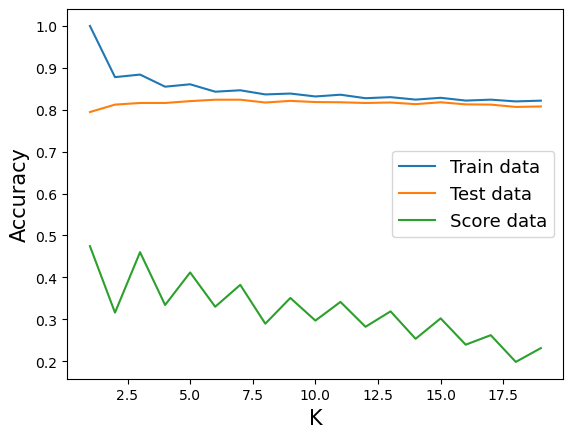

In [128]:
from sklearn.neighbors import KNeighborsClassifier 
import matplotlib.pyplot as plt
k_list = range(1,20) # K 설정
train_accuracies = []
test_accuracies = []
score_list = []
for k in k_list:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, Y_train)

    train_accuracies.append(classifier.score(X_train, Y_train))
    test_accuracies.append(classifier.score(X_valid, Y_valid))
        
    valid_pred = classifier.predict(X_valid)
    tem = f1_score(valid_pred,Y_valid) # 성능지표 = f1-score 사용
    score_list.append(tem)    
    
plt.plot(k_list, train_accuracies,label="Train data")
plt.plot(k_list, test_accuracies,label="Test data")
plt.plot(k_list, score_list,label="Score data")
plt.xlabel("K",fontsize = 15)
plt.ylabel("Accuracy",fontsize = 15)
plt.legend(fontsize= 13)
plt.show()

In [132]:
# K값이 6일 때 Test 성능이 가장 좋음
# f1_score는 1일 때 가장 좋으나 K=1 이면 과적합 가능성이 있어서 K 값은 3으로 결정

In [133]:
from sklearn.neighbors import KNeighborsClassifier 

# n_neighbors = K 
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X_train, Y_train)

train_preds = classifier.predict(X_train) # 학습 데이터 예측
preds = classifier.predict(X_valid) # 테스트 데이터 예측

print("예측 결과")
print(preds[:10])
print("")
print("성능")
print(classifier.score(X_valid, Y_valid))



예측 결과
[0 0 0 1 0 1 1 0 0 0]

성능
0.8161111111111111


In [134]:
print_all_reg(Y_valid, preds)
# KNN의 f1_score : 0.33

model의 recall 값은 0.384
model의 2종 오류 확률 값은 0.616
model의 Specificity 값은 0.927
model의 1종 오류 확률 값은 0.073
model의 precision 값은 0.573
model의 f1_score 값은 0.460
model의 G-mean 값은 0.597
model의 accuracy 값은 0.816


In [135]:
knn_pred = preds # 결과값 저장

### DT

#### 사전 가지치기

In [136]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import ParameterGrid
# 원하는 파라미터 설정 (파라미터를 추가하려면 위의 함수에도 추가해줘야함.)
# 사전 가지치기를 위한 하이퍼 파라미터들
params={
    "max_depth":[4,5,6,7,8,9,10],
    "min_samples_leaf" : [2, 3, 4, 5, 6],
    "min_samples_split" : range(2,16,2), #2, 4, 6
    "max_leaf_nodes": [5,10,15]
}

# ParameterGrid 통해서 모든 경우의 수 만들기
params_list = list(ParameterGrid(params)) # 4x3x3x3 = 총 108개의 경우의수를 담은 리스트 반환
print(params_list[0])
print(" ")

# Grid search 진행
score_list = []
for params2 in params_list:
    model_use = DecisionTreeClassifier(random_state = 0,max_depth = params2["max_depth"],min_samples_leaf = params2["min_samples_leaf"],
                                   min_samples_split = params2["min_samples_split"],max_leaf_nodes = params2["max_leaf_nodes"]
                                  )
    model_use.fit(X_train, Y_train)
    valid_pred = model_use.predict(X_valid)
    tem = f1_score(valid_pred,Y_valid) # 성능지표 = f1-score 사용
    score_list.append(tem)

# BEST SCORE 계산
best_index= np.argmax(score_list) # 가장 높은 f1-score 갖는 경우를 best case로 설정
print("BEST SCORE", score_list[best_index])
print("BEST PARAMS", params_list[best_index])

{'max_depth': 4, 'max_leaf_nodes': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
 
BEST SCORE 0.559463986599665
BEST PARAMS {'max_depth': 5, 'max_leaf_nodes': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [137]:
# best case의 하이퍼파라미터로 의사결정나무 학습

model_use = DecisionTreeClassifier(random_state = 0,max_depth = params_list[best_index]["max_depth"],min_samples_leaf = params_list[best_index]["min_samples_leaf"],
                                   min_samples_split = params_list[best_index]["min_samples_split"],max_leaf_nodes = params_list[best_index]["max_leaf_nodes"]
                                  )
model_use.fit(X_train, Y_train)
pred_train = model_use.predict(X_train)
pred_test = model_use.predict(X_valid)
tem = f1_score(Y_valid,pred_test)
print(tem)

#출력
print("Train 데이터 성능")
print_all_reg(Y_train,pred_train)
print(" ")
print("TEST 데이터 성능")
print_all_reg(Y_valid,pred_test)

0.559463986599665
Train 데이터 성능
model의 recall 값은 0.439
model의 2종 오류 확률 값은 0.561
model의 Specificity 값은 0.959
model의 1종 오류 확률 값은 0.041
model의 precision 값은 0.731
model의 f1_score 값은 0.549
model의 G-mean 값은 0.649
model의 accuracy 값은 0.853
 
TEST 데이터 성능
model의 recall 값은 0.455
model의 2종 오류 확률 값은 0.545
model의 Specificity 값은 0.956
model의 1종 오류 확률 값은 0.044
model의 precision 값은 0.726
model의 f1_score 값은 0.559
model의 G-mean 값은 0.660
model의 accuracy 값은 0.854


In [138]:
DT_pred = pred_test #사전 가지치기 결과값 저장

#### 사후 가지치기

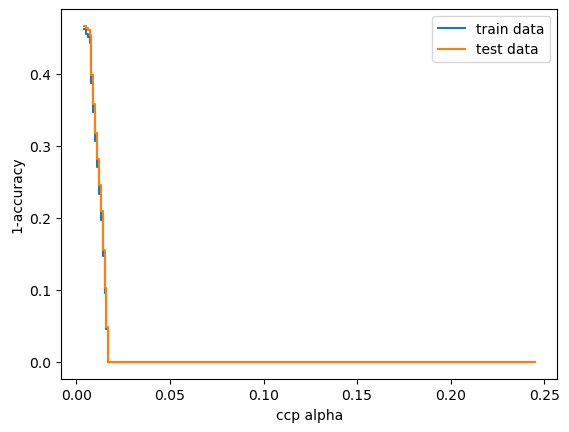

가장 좋은 test 성능을 보이는 ccp_alpha 값: 0.0009999999999997788


In [72]:
from sklearn.tree import DecisionTreeClassifier

ccp_alpha_list = np.arange(0.25,0,-0.001) # 0.25부터 0까지 0.001씩 감소
train_scores =[]
test_scores =[]
for alpha in ccp_alpha_list:
    clf = DecisionTreeClassifier(ccp_alpha= alpha) #
    clf.fit(X_train,Y_train) # 학습용 데이터로 모델 학습

    preds_train = clf.predict(X_train) # 모델 예측
    preds = clf.predict(X_valid)

    train_scores.append(f1_score(Y_train,preds_train)) # 학습용 데이터 오분류율
    test_scores.append(f1_score(Y_valid,preds)) # 테스트 데이터 오분류율
    
# ccp-alpha 값을 변화시키면서 얻은 모델 결과 시각화

fig, ax = plt.subplots()
ax.set_xlabel("ccp alpha")
ax.set_ylabel("1-accuracy")

#ax.set_title("나무 복잡도 증가에 따른 오분류율 그래프")
ax.plot(ccp_alpha_list, pd.Series(train_scores).rolling(10,center =True).mean(),  label="train data", drawstyle="steps-post") #train_socres 데이터 10개단위로 이동평균, 중심점은 5번째 데이터
ax.plot(ccp_alpha_list, pd.Series(test_scores).rolling(10,center=True).mean(),  label="test data", drawstyle="steps-post")

# ax.plot(ccp_alpha_list, train_scores, drawstyle="steps-post")
# ax.plot(ccp_alpha_list, test_scores, drawstyle="steps-post")

ax.legend()
#plt.xlim(0.7)
plt.show()
plt.close('all')
best_ccp_alpha_index = np.argmax(test_scores)
best_ccp_alpha = ccp_alpha_list[best_ccp_alpha_index]
print("가장 좋은 test 성능을 보이는 ccp_alpha 값:", best_ccp_alpha)

In [73]:
# 최적 ccp-alpha로 모델 학습

alpha = 0.0001
clf = DecisionTreeClassifier(ccp_alpha= alpha)
clf.fit(X_train,Y_train)
preds = clf.predict(X_valid)
preds_train = clf.predict(X_train) # 훈련용 X 데이터셋으로 예측값 생성
print_all_reg(Y_train,preds_train) # 실제 y값과 예측값을 비교하여 성능지표 출력
print(" ")
print_all_reg(Y_valid,preds)

model의 recall 값은 0.987
model의 2종 오류 확률 값은 0.013
model의 Specificity 값은 1.000
model의 1종 오류 확률 값은 0.000
model의 precision 값은 0.999
model의 f1_score 값은 0.993
model의 G-mean 값은 0.993
model의 accuracy 값은 0.997
 
model의 recall 값은 0.515
model의 2종 오류 확률 값은 0.485
model의 Specificity 값은 0.871
model의 1종 오류 확률 값은 0.129
model의 precision 값은 0.505
model의 f1_score 값은 0.510
model의 G-mean 값은 0.670
model의 accuracy 값은 0.798


In [ ]:
# 사후가지치기는 해당 모델에서 ccp alpha 값이 0에 가까워질수록 오분류율이 감소하여 과적합 발생
# 사전가지치기로 진행

### SVM-rbf kernel

In [107]:
# 비선형 svm - rbf
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import ParameterGrid

# 사용 하이퍼파라미터:C, gamma = 커널의 곡률을 결정함

#gamma: 커널 계수를 조절하는 파라미터. 클수록 모델이 훈련 데이터에 fitting 되며, 작을수록 일반화
# 작은 gamma 값은 결정 경계를 부드럽게 만들어 과소적합을 유발하는 반면, 반대로 큰 gamma 값은 결정 경계를 복잡하게 만들어 과대적합을 유발함
param_grid = {"C": [1, 3, 5, 7, 10],
              "gamma": [0.001, 0.01, 0.1, 1, 10]}

# ParameterGrid 통해서 모든 경우의 수 만들기
params_list = list(ParameterGrid(param_grid))

# Grid search 진행
score_list = []
for params2 in params_list:
    model_use = SVC(kernel='rbf',C = params2["C"],gamma = params2["gamma"])
    model_use.fit(X_train, Y_train)
    valid_pred = model_use.predict(X_valid)
    tem = f1_score(valid_pred,Y_valid) # 성능지표 = f1-score 사용
    score_list.append(tem)

# BEST SCORE 계산
best_index= np.argmax(score_list) # 가장 높은 f1-score 갖는 경우를 best case로 설정
print("BEST SCORE", score_list[best_index])
print("BEST PARAMS", params_list[best_index])

BEST SCORE 0.5391304347826087
BEST PARAMS {'C': 10, 'gamma': 1}


In [108]:
# best case의 하이퍼파라미터로 SVM
SVM_best_model = SVC(kernel='rbf',C = params_list[best_index]["C"],gamma = params_list[best_index]["gamma"])
# SVM_best_model = SVC(kernel='rbf',C = 10,gamma =1) #0.1, 1, 1000 넣고 비교해보기

SVM_best_model.fit(X_train, Y_train)
pred_train = SVM_best_model.predict(X_train)
pred_test = SVM_best_model.predict(X_valid)
tem = f1_score(Y_valid,pred_test)
print(tem)

#출력
print("Train 데이터 성능")
print_all_reg(Y_train,pred_train)
print(" ")
print("TEST 데이터 성능")
print_all_reg(Y_valid,pred_test)


0.5391304347826087
Train 데이터 성능
model의 recall 값은 0.467
model의 2종 오류 확률 값은 0.533
model의 Specificity 값은 0.981
model의 1종 오류 확률 값은 0.019
model의 precision 값은 0.863
model의 f1_score 값은 0.606
model의 G-mean 값은 0.677
model의 accuracy 값은 0.876
 
TEST 데이터 성능
model의 recall 값은 0.422
model의 2종 오류 확률 값은 0.578
model의 Specificity 값은 0.963
model의 1종 오류 확률 값은 0.037
model의 precision 값은 0.745
model의 f1_score 값은 0.539
model의 G-mean 값은 0.638
model의 accuracy 값은 0.853


In [109]:
#SVM으로 예측값 반환
SVM_pred = SVM_best_model.predict(X_valid)

## Submission File

In [110]:
SVM_submit = pd.DataFrame(SVM_pred, columns=['SVM 예측'])
knn_submit = pd.DataFrame(knn_pred, columns=['KNN 예측'])
DT_submit = pd.DataFrame(DT_pred, columns=['DT 예측'])

In [111]:
SVM_submit

,SVM 예측
0,0
1,0
2,0
3,1
4,0
...,...
1795,0
1796,0
1797,0
1798,1


In [139]:
classification_pred = pd.concat([knn_submit, DT_submit, SVM_submit], axis=1)
classification_pred.to_csv('문제2_predict.csv', index=False, encoding='euc-kr')

In [140]:
classification_pred

,KNN 예측,DT 예측,SVM 예측
0,0,0,0
1,0,0,0
2,0,0,0
3,0,1,1
4,0,0,0
...,...,...,...
1795,0,0,0
1796,0,0,0
1797,0,0,0
1798,0,1,1


# f1_score

### 결과
#### KNN : 0.46
#### DT : 0.559
#### SVM : 0.539